In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import os
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")


In [9]:
class Perceptron:
    def __init__(self,  eta : float = None, epochs : int = None):
        self.weights = np.random.randn(3) * 1e-4
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"inital weights before training: \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
        

    def _z_outcome(self , inputs, weights):
        return np.dot(inputs, weights)    #w1.x1+w2.x2+.....wn.xn

    def activation_function(self, z):
        return np.where(z > 0,1,0)

    def fit(self, X, y):
        self.X = X
        self.y = y

        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias: \n {X_with_bias}")

        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)

            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass :   \n{y_hat}")

            self.error = self.y - y_hat
            print(f"error: \n{self.error}")     # Calculating error y - y_hat


            self.weights = self.weights + self.eta * np.dot(X_with_bias.T , self.error)   # Update weights with learning rate 
            print(f"Updated weights after epoch: {epoch+ 1}/ {self.epochs} : \n{self.weights}")
            print("##"*10)

            

            
            

    def predict(self,X):
         X_with_bias = np.c_[X, -np.ones((len(X),1))]
         z = self._z_outcome(X_with_bias, self.weights)
         return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss:{total_loss}\n")
        return total_loss

    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok =True)
        return os.path.join(model_dir, filename)
        

    def save(self, filename, model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)

    def load(self, filepath):
        return joblib.load(filepath)



In [3]:
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col, axis = 1)
    y = df[target_col]

    return X,y

In [4]:
AND = {
        "X1" : [0,0,1,1],
        "X2" : [0,1,0,1],
        "y"  : [0,0,0,1]
    
}

df_AND = pd.DataFrame(AND)

In [5]:
df_AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
X,y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_AND = Perceptron(eta = ETA, epochs = EPOCHS)
model_AND.fit(X,y)
model_AND.total_loss()

inital weights before training: 
[ 1.10078322e-04  6.68380627e-05 -3.52050100e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass :   
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/ 10 : 
[-0.09988992 -0.09993316  0.29996479]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass :   
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 2/ 10 : 
[1.10078322e-04 6.68380627e-05 1.99964795e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass :   
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 3/ 10 : 
[0.10011008 0.10006684 0.09996479]
####################
--------------------
for epoch >> 3
-------------

0

In [7]:
model_AND.save(filename = "AND.model")

In [10]:
reload_and = Perceptron().load(filepath = "model/and.model")

In [13]:
reload_and.predict(X=[[1,1]])

array([1])

In [14]:
XOR = {
        "X1" : [0,0,1,1],
        "X2" : [0,1,0,1],
        "y"  : [0,1,1,0]
    
}

df_XOR = pd.DataFrame(XOR)

In [20]:
df_XOR

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


X,y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10

model_XOR = Perceptron(eta = ETA, epochs = EPOCHS)
model_XOR.fit(X,y)
model_XOR.total_loss()

In [19]:
X,y = prepare_data(df_XOR)

ETA = 0.1

EPOCHS = 10

model_XOR = Perceptron(eta = ETA, epochs = EPOCHS) 
model_XOR.fit(X,y) 
model_XOR.total_loss()

inital weights before training: 
[-1.18696194e-04  6.40207874e-05  1.25447188e-04]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass :   
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/ 10 : 
[ 0.0998813   0.10006402 -0.19987455]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass :   
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epoch: 2/ 10 : 
[-1.18696194e-04  6.40207874e-05  1.25447188e-04]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass :   
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/ 10 : 
[ 0.0998813   0.10006402 -0.19987455]
####################
--------------------
for epoch >> 3
-------

-2

In [26]:
def save_plot(df, model, filename = "plot.png", plot_dir= "plots"):
    
    def _create_base_plot(df):
        df.plot(kind = "scatter", x = "X1", y= "X2", c = "y" , s = 100, cmap = "coolwarm")
        plt.axhline(y = 0, color = "black", linestyle="--" , linewidth = 1)
        plt.axhline(x = 0, color = "black" , linestyle="--", linewidth =1)

        figure = plt.gcf()
        figure.set_size_inches(10,8)
        
    def _plot_decision_regions(X,y, classifier, resolution = 0.02):
        color = ("cyan" , "lightgreen")
        cmap = ListedColormap(colors)

        X = X.values
        x1 = X[:,0]
        x2 = X[:,1]

        x1_min, x2_max = x1.min() - 1, x2.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution ),
                               np.arange(x2_min,x2_max,resolution))
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1,xx2, y_hat, alpha = 0.3, cmap = cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        plt.plot()

    

    X, y = prepare_data(df)

    _create_base_plot(df)
    _plot_decision_regions(X, y, model)

    os.makedirs(plot_dir, exist_0k =True)
    plot_path= os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

AttributeError: Line2D.set() got an unexpected keyword argument 'x'

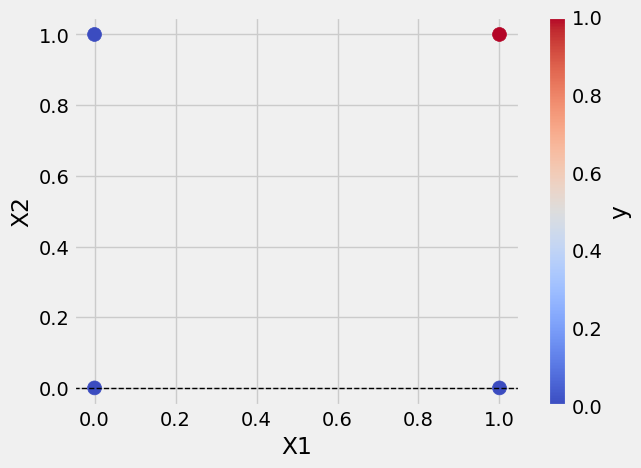

In [27]:
save_plot(df_AND, model_AND )